In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [4]:
crime['Location Description'] = crime['Location Description'].fillna(crime['Latitude'].mode()[0])
crime['Community Area'] = crime['Community Area'].fillna(crime['Community Area'].mode()[0])
crime['X Coordinate'] = crime['X Coordinate'].fillna(crime['X Coordinate'].mode()[0])
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(crime['Y Coordinate'].mode()[0])
crime['Latitude'] = crime['Latitude'].fillna(crime['Latitude'].mode()[0])
crime['Longitude'] = crime['Longitude'].fillna(crime['Longitude'].mode()[0])
crime['Location'] = crime['Location'].fillna(crime['Location'].mode()[0])

In [5]:
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
crime['Case Number'] = crime['Case Number'].astype('category')
crime['Date'] = crime['Date'].astype('category')
crime['Block'] = crime['Block'].astype('category')
crime['IUCR'] = crime['IUCR'].astype('category')
crime['Primary Type'] = crime['Primary Type'].astype('category')
crime['Description'] = crime['Description'].astype('category')
crime['Location Description'] = crime['Location Description'].astype('object')
crime['Community Area'] = crime['Community Area'].astype('category')
crime['FBI Code'] = crime['FBI Code'].astype('category')
crime['X Coordinate'] = crime['X Coordinate'].astype('category')
crime['Y Coordinate'] = crime['Y Coordinate'].astype('category')
crime['Updated On'] = crime['Updated On'].astype('category')
crime['Latitude'] = crime['Latitude'].astype('category')
crime['Longitude'] = crime['Longitude'].astype('category')
crime['Location'] = crime['Location'].astype('category')

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  category
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  object  
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  category
 14  FBI Code              249123 non-nul

<h1>QUESTIONS</h1>

### Q1. What are the top 10 most common primary crime types in Chicago?

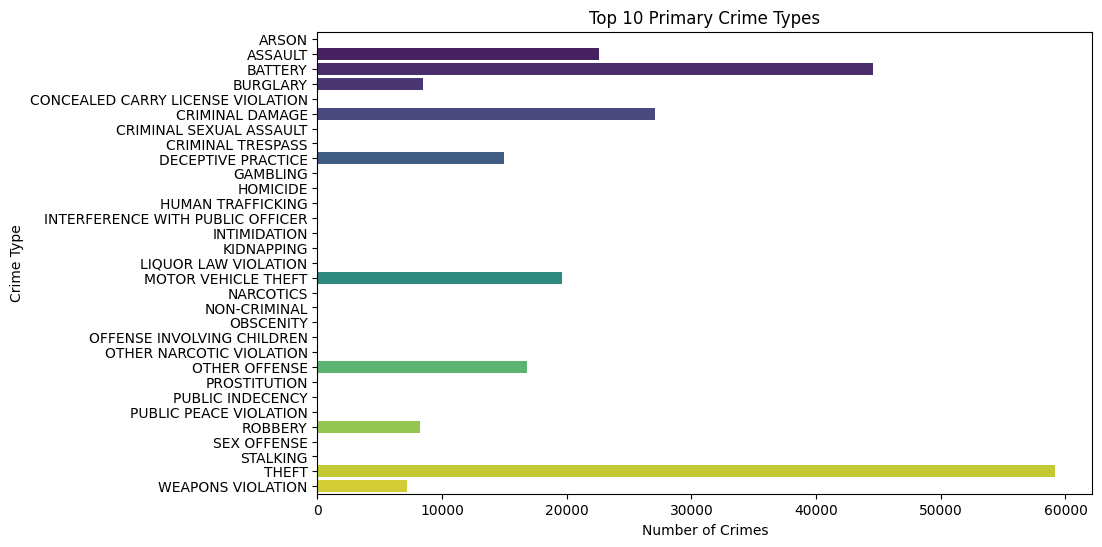

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
OTHER OFFENSE          16781
DECEPTIVE PRACTICE     14991
BURGLARY                8443
ROBBERY                 8200
WEAPONS VIOLATION       7164
Name: count, dtype: int64

In [8]:
top_types = crime['Primary Type'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_types.values, y=top_types.index, palette='viridis')
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()
top_types


**Insight:** The plot shows which crime types are most prevalent in Chicago, helping prioritize law enforcement resources.

### Q2. How has the number of crimes changed over the years?

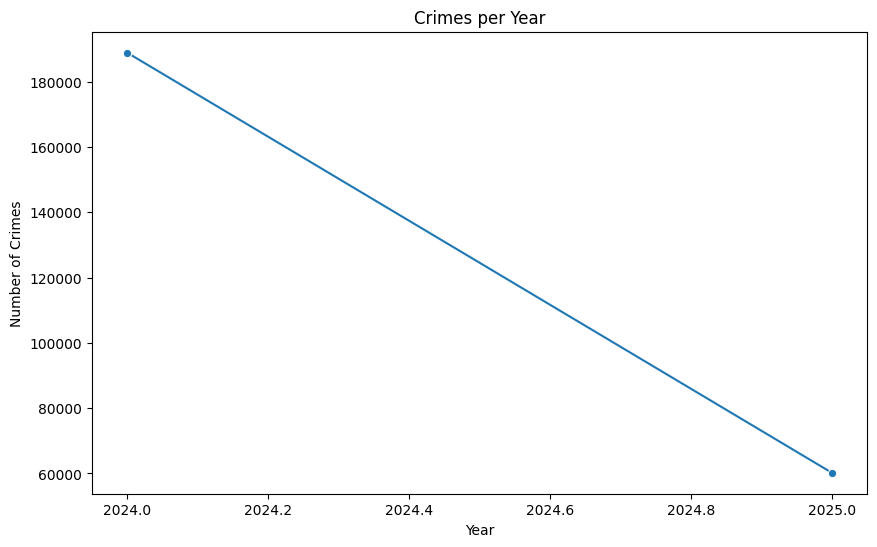

Year
2024    188918
2025     60205
Name: count, dtype: int64

In [9]:
yearly = crime['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()
yearly

**Insight:** This trend helps identify whether crime is increasing or decreasing over time.

### Q3. What are the top 10 locations where crimes most frequently occur?

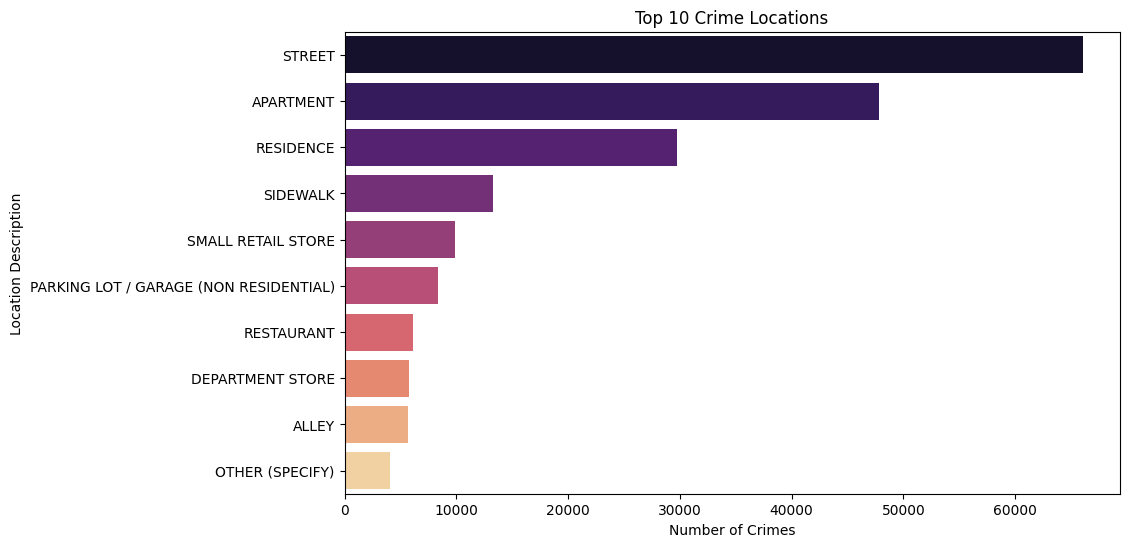

Location Description
STREET                                    66040
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
Name: count, dtype: int64

In [10]:
top_locations = crime['Location Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top 10 Crime Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.show()
top_locations

**Insight:** Certain locations are more prone to crime, indicating potential hotspots.

### Q4. What is the distribution of arrests vs. non-arrests?

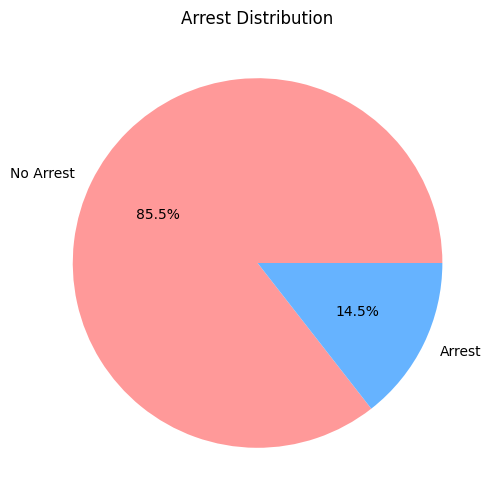

Arrest
False    213121
True      36002
Name: count, dtype: int64

In [11]:
arrest_counts = crime['Arrest'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(arrest_counts, labels=['No Arrest', 'Arrest'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Arrest Distribution')
plt.show()
arrest_counts

**Insight:** The majority of crimes do not result in an arrest.

### Q5. Which community areas have the highest crime rates?

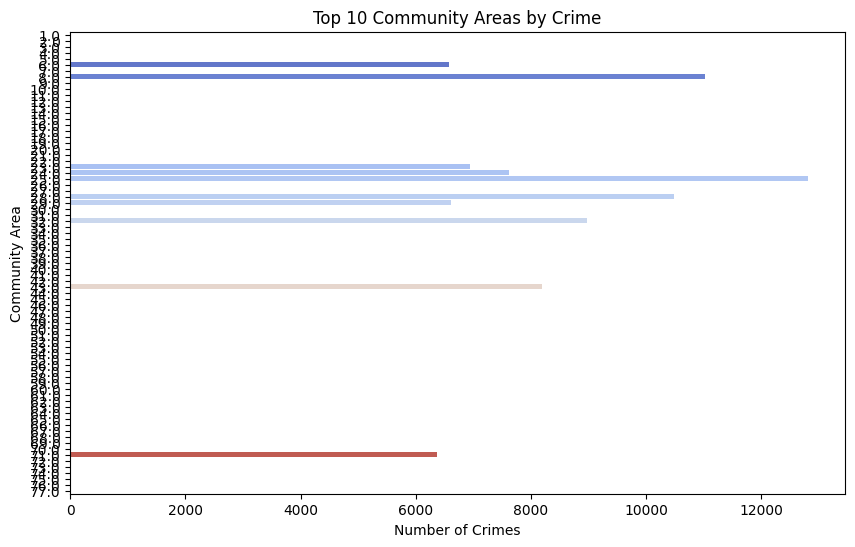

Community Area
25.0    12817
8.0     11019
28.0    10489
32.0     8975
43.0     8190
24.0     7615
23.0     6936
29.0     6605
6.0      6585
71.0     6365
Name: count, dtype: int64

In [12]:
top_areas = crime['Community Area'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')
plt.title('Top 10 Community Areas by Crime')
plt.xlabel('Number of Crimes')
plt.ylabel('Community Area')
plt.show()
top_areas

**Insight:** Some community areas experience significantly more crime than others.

### Q6. What is the monthly trend of crimes?

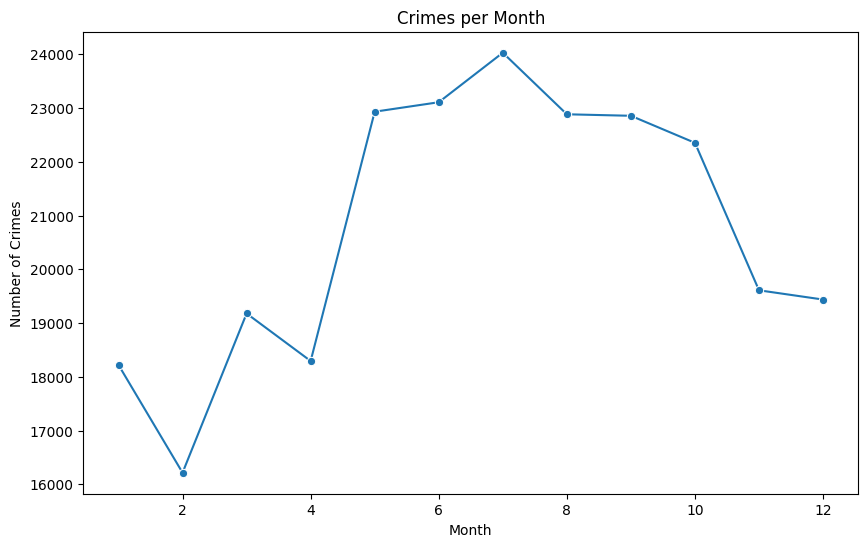

Month
1     18222
2     16217
3     19179
4     18295
5     22932
6     23108
7     24029
8     22884
9     22856
10    22353
11    19610
12    19438
Name: count, dtype: int64

In [13]:
crime['Month'] = pd.to_datetime(crime['Date'].astype(str), errors='coerce').dt.month
monthly = crime['Month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()
monthly

**Insight:** Certain months may have higher crime rates, possibly due to weather or events.

### Q7. What is the distribution of crimes by hour of the day?

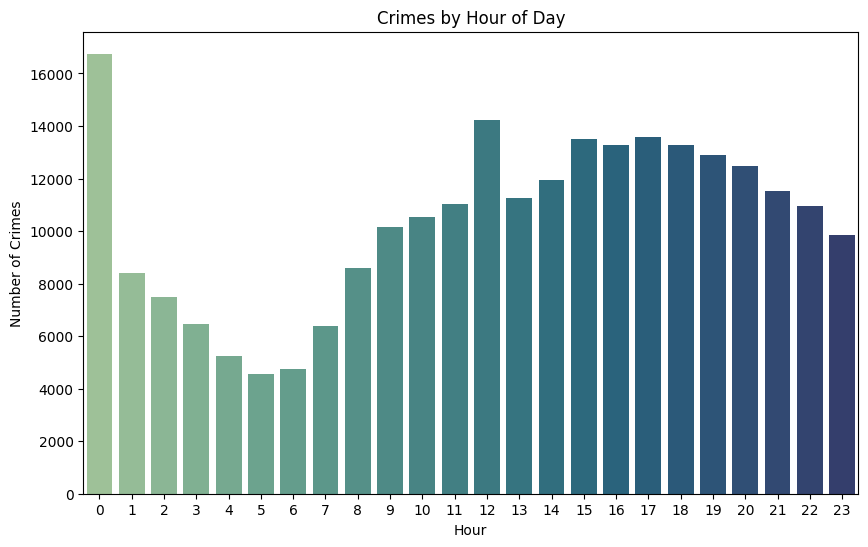

Hour
0     16752
1      8420
2      7504
3      6477
4      5227
5      4551
6      4744
7      6368
8      8576
9     10171
10    10543
11    11023
12    14247
13    11268
14    11936
15    13511
16    13288
17    13566
18    13286
19    12902
20    12460
21    11534
22    10936
23     9833
Name: count, dtype: int64

In [14]:
crime['Hour'] = pd.to_datetime(crime['Date'].astype(str), errors='coerce').dt.hour
hourly = crime['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=hourly.index, y=hourly.values, palette='crest')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()
hourly

**Insight:** Crime frequency varies by hour, with peaks at certain times.

### Q8. What is the proportion of domestic vs. non-domestic crimes?

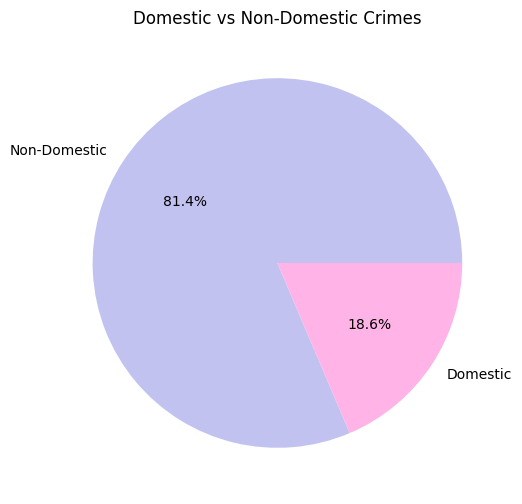

Domestic
False    202776
True      46347
Name: count, dtype: int64

In [15]:
domestic_counts = crime['Domestic'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(domestic_counts, labels=['Non-Domestic', 'Domestic'], autopct='%1.1f%%', colors=['#c2c2f0','#ffb3e6'])
plt.title('Domestic vs Non-Domestic Crimes')
plt.show()
domestic_counts

**Insight:** Most crimes are non-domestic, but domestic crimes are still significant.

### Q9. Which wards have the highest number of crimes?

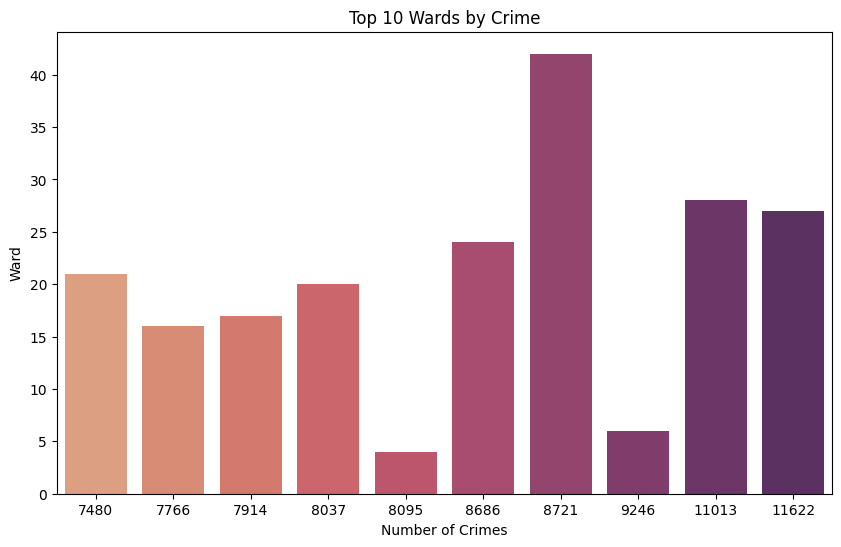

Ward
27    11622
28    11013
6      9246
42     8721
24     8686
4      8095
20     8037
17     7914
16     7766
21     7480
Name: count, dtype: int64

In [16]:
top_wards = crime['Ward'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_wards.values, y=top_wards.index, palette='flare')
plt.title('Top 10 Wards by Crime')
plt.xlabel('Number of Crimes')
plt.ylabel('Ward')
plt.show()
top_wards

**Insight:** Crime is concentrated in certain wards.

### Q10. What are the most common FBI codes for crimes?

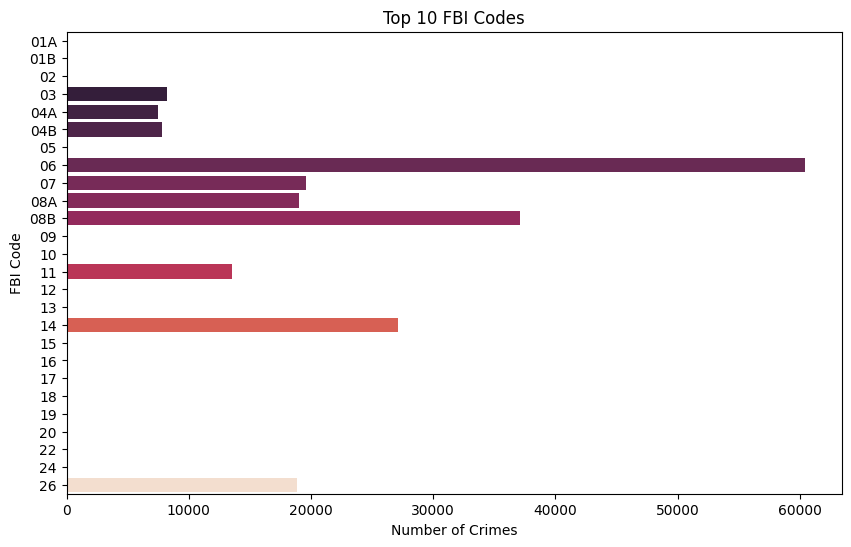

FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
26     18855
11     13534
03      8200
04B     7851
04A     7473
Name: count, dtype: int64

In [17]:
top_fbi = crime['FBI Code'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_fbi.values, y=top_fbi.index, palette='rocket')
plt.title('Top 10 FBI Codes')
plt.xlabel('Number of Crimes')
plt.ylabel('FBI Code')
plt.show()
top_fbi

**Insight:** Certain FBI codes are much more common, indicating prevalent crime categories.

### Q11. What is the trend of arrests over the years?

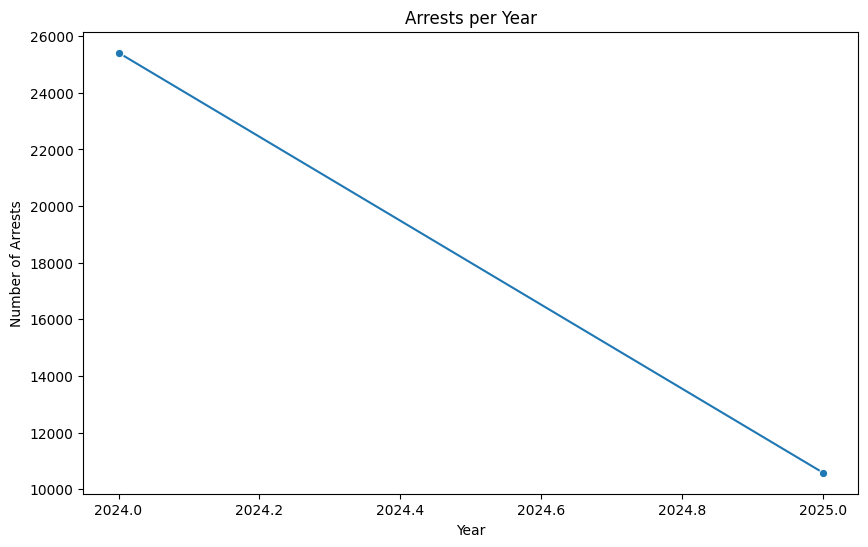

Year
2024    25417
2025    10585
Name: Arrest, dtype: int64

In [18]:
arrest_trend = crime.groupby('Year')['Arrest'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=arrest_trend.index, y=arrest_trend.values, marker='o')
plt.title('Arrests per Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.show()
arrest_trend

**Insight:** Arrests may follow or diverge from overall crime trends.

### Q12. Which primary crime types have the highest arrest rates?

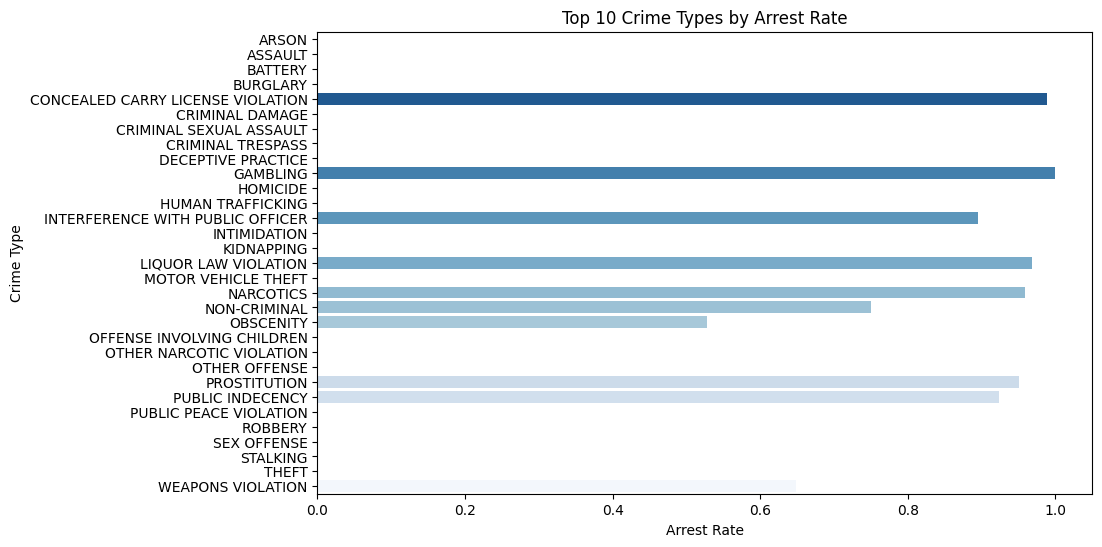

Primary Type
GAMBLING                             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.987952
LIQUOR LAW VIOLATION                 0.968750
NARCOTICS                            0.958352
PROSTITUTION                         0.951220
PUBLIC INDECENCY                     0.923077
INTERFERENCE WITH PUBLIC OFFICER     0.894942
NON-CRIMINAL                         0.750000
WEAPONS VIOLATION                    0.648520
OBSCENITY                            0.528302
Name: Arrest, dtype: float64

In [19]:
arrest_rate = crime.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette='Blues_r')
plt.title('Top 10 Crime Types by Arrest Rate')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.show()
arrest_rate

**Insight:** Some crime types are more likely to result in arrest.

### Q13. What is the distribution of crimes by police district?

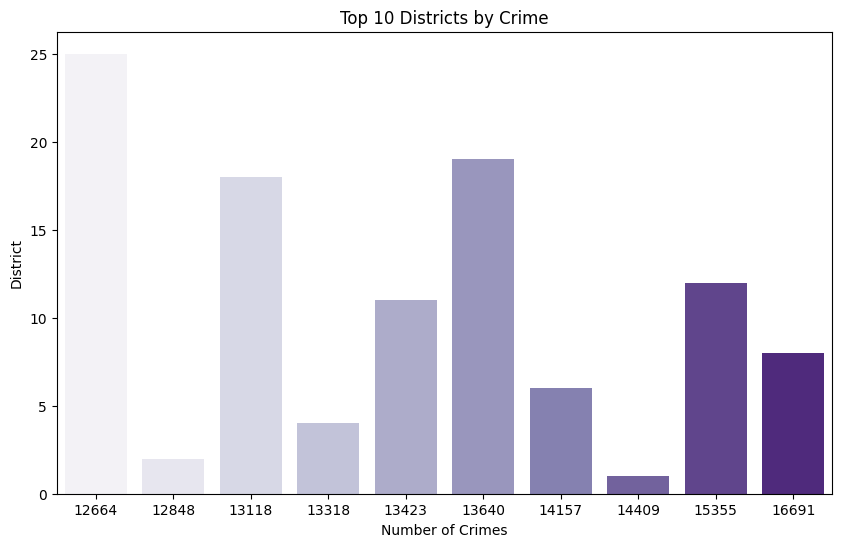

District
8     16691
12    15355
1     14409
6     14157
19    13640
11    13423
4     13318
18    13118
2     12848
25    12664
Name: count, dtype: int64

In [20]:
district_counts = crime['District'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='Purples')
plt.title('Top 10 Districts by Crime')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.show()
district_counts

<h3> Some police districts handle more crime than others.

### Q14. What is the trend of domestic crimes over the years?

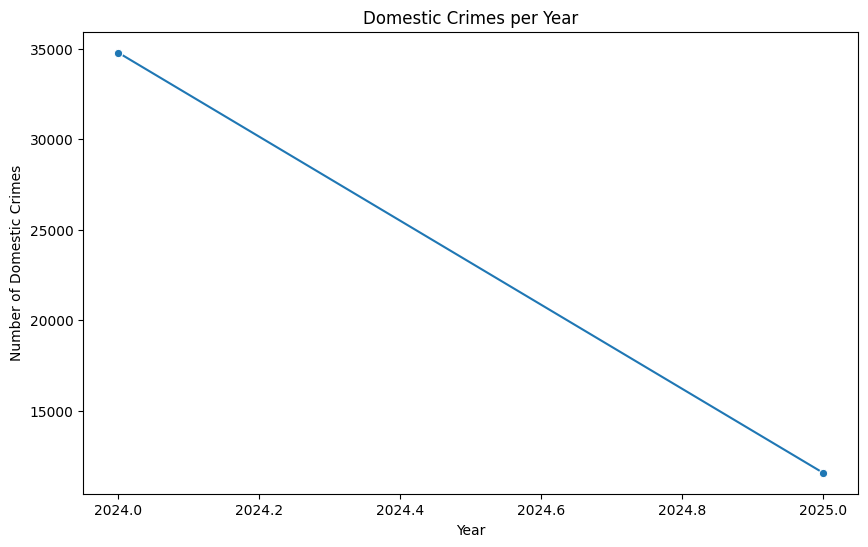

Year
2024    34773
2025    11574
Name: Domestic, dtype: int64

In [21]:
domestic_trend = crime.groupby('Year')['Domestic'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=domestic_trend.index, y=domestic_trend.values, marker='o')
plt.title('Domestic Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Domestic Crimes')
plt.show()
domestic_trend

**Insight:** Domestic crime trends may differ from overall crime trends.

### Q15. What are the most common IUCR codes?

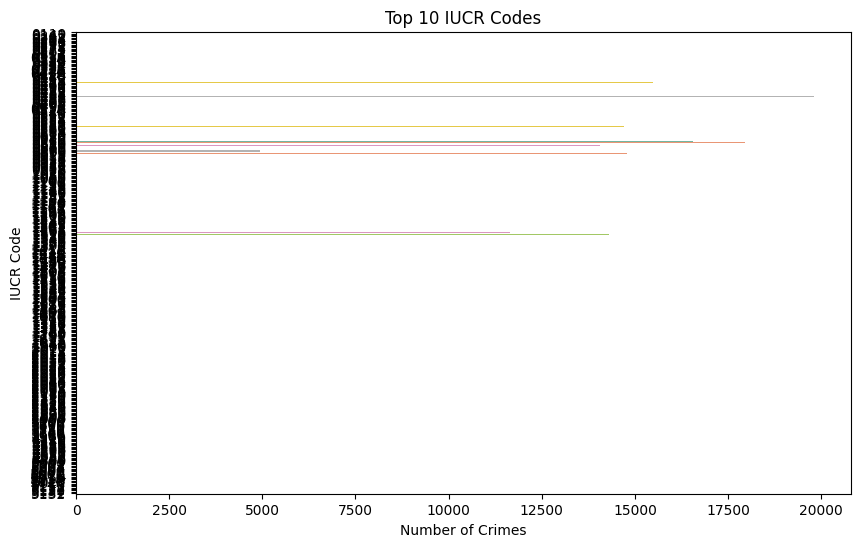

IUCR
0486    19810
0820    17963
0810    16572
0460    15486
0910    14780
0560    14708
1320    14315
0860    14053
1310    11652
0890     4941
Name: count, dtype: int64

In [22]:
top_iucr = crime['IUCR'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_iucr.values, y=top_iucr.index, palette='Set2')
plt.title('Top 10 IUCR Codes')
plt.xlabel('Number of Crimes')
plt.ylabel('IUCR Code')
plt.show()
top_iucr

**Insight:** IUCR codes help categorize crime types for analysis.

### Q16. What is the correlation between X and Y coordinates of crimes?

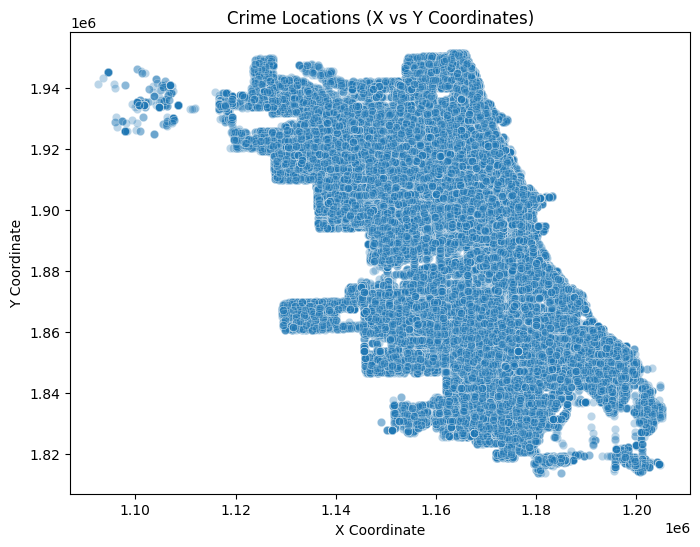

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=crime['X Coordinate'].astype(float), y=crime['Y Coordinate'].astype(float), alpha=0.3)
plt.title('Crime Locations (X vs Y Coordinates)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

**Insight:** The scatter plot shows the spatial distribution of crimes.

### Q17. What is the distribution of crimes by latitude and longitude?

**Insight:** Density plot highlights areas with high crime concentration.

### Q18. What are the most common crime descriptions?

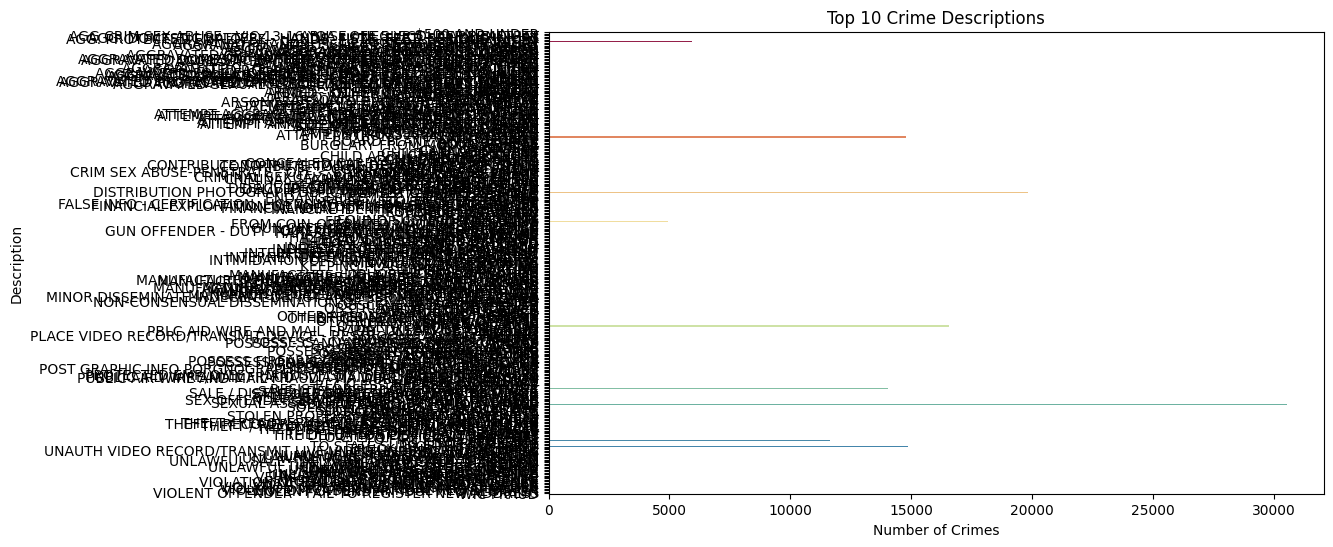

Description
SIMPLE                     30526
DOMESTIC BATTERY SIMPLE    19810
$500 AND UNDER             17963
OVER $500                  16572
TO VEHICLE                 14886
AUTOMOBILE                 14780
RETAIL THEFT               14053
TO PROPERTY                11652
AGGRAVATED - HANDGUN        5935
FROM BUILDING               4941
Name: count, dtype: int64

In [24]:
top_desc = crime['Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_desc.values, y=top_desc.index, palette='Spectral')
plt.title('Top 10 Crime Descriptions')
plt.xlabel('Number of Crimes')
plt.ylabel('Description')
plt.show()
top_desc

**Insight:** Certain descriptions are much more frequent, indicating common crime scenarios.

### Q19. What is the distribution of crimes by beat?

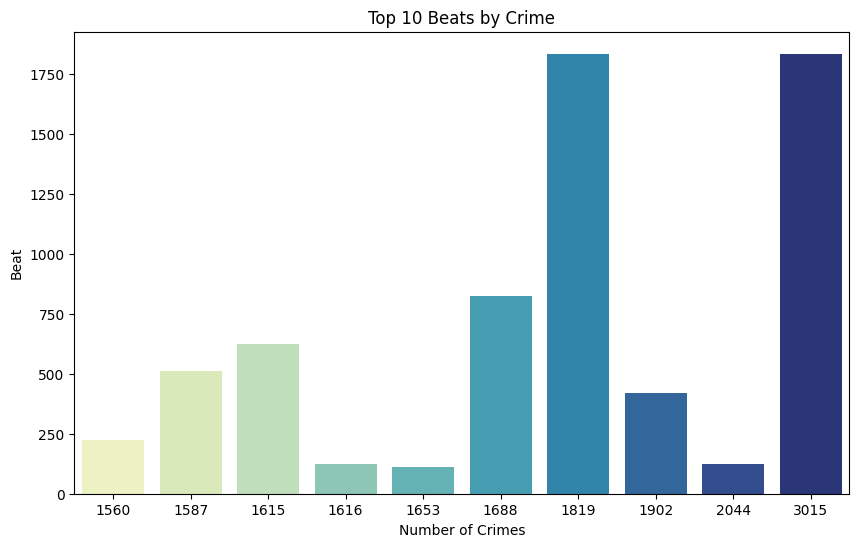

Beat
1834    3015
123     2044
421     1902
1831    1819
823     1688
111     1653
122     1616
624     1615
511     1587
222     1560
Name: count, dtype: int64

In [25]:
top_beats = crime['Beat'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_beats.values, y=top_beats.index, palette='YlGnBu')
plt.title('Top 10 Beats by Crime')
plt.xlabel('Number of Crimes')
plt.ylabel('Beat')
plt.show()
top_beats

**Insight:** Some beats are more active in terms of crime.

### Q20. What is the trend of crimes by month for the most recent year?

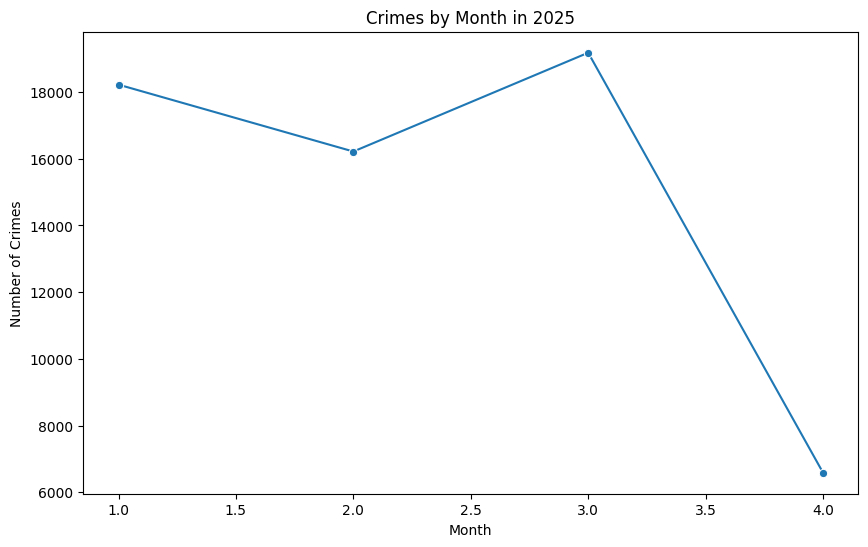

Date
1    18222
2    16217
3    19179
4     6587
Name: count, dtype: int64

In [26]:
recent_year = crime['Year'].max()
recent_crime = crime[crime['Year'] == recent_year]
recent_monthly = pd.to_datetime(recent_crime['Date'].astype(str), errors='coerce').dt.month.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=recent_monthly.index, y=recent_monthly.values, marker='o')
plt.title(f'Crimes by Month in {recent_year}')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()
recent_monthly

**Insight:** Seasonal patterns can be observed for the most recent year.

### Q21. What is the distribution of crimes by block?

**Insight:** Certain blocks are hotspots for crime.

### Q22. What is the distribution of crimes by year and primary type?

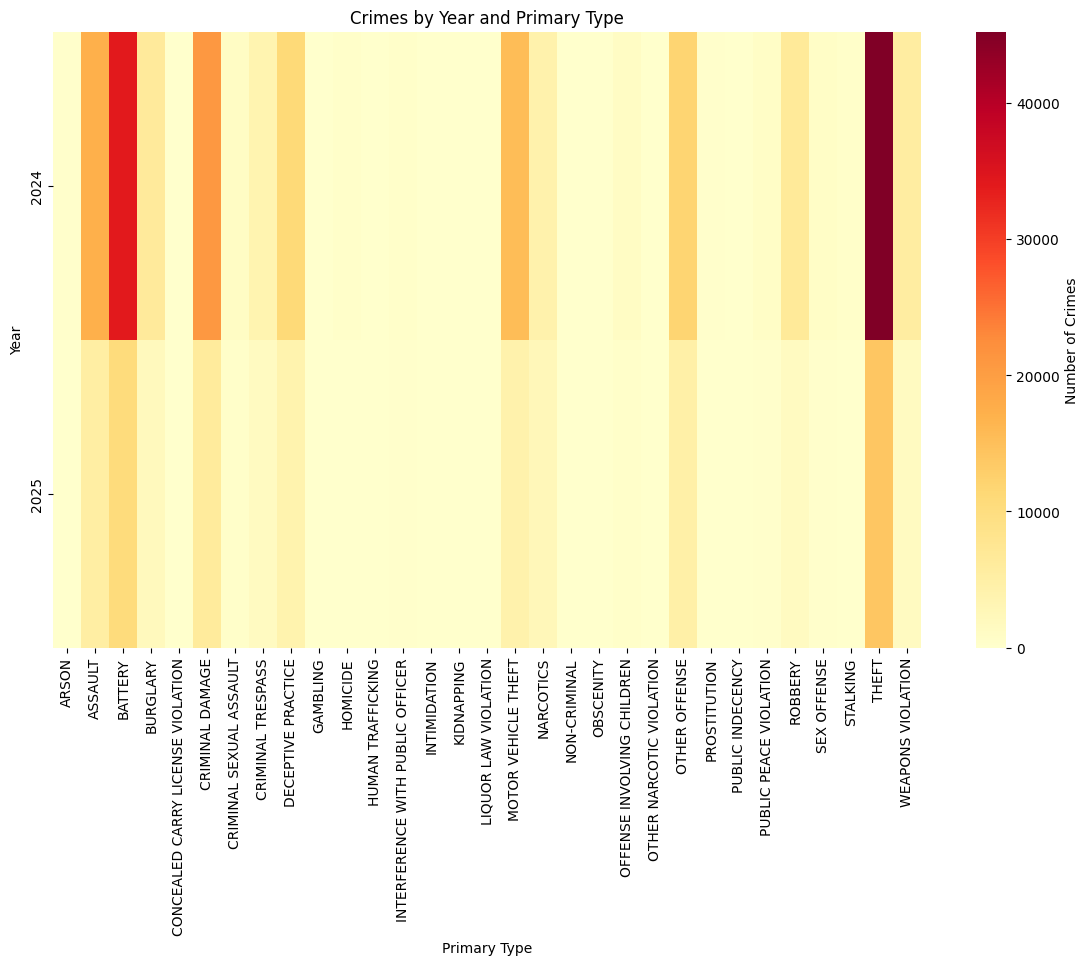

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2024,352,17298,34052,6483,157,20869,1155,3621,11082,18,...,4,12000,244,8,738,6647,872,395,45239,5638
2025,100,5317,10527,1960,92,6225,418,1424,3909,0,...,3,4781,43,5,268,1553,338,125,13962,1526


In [27]:
import pandas as pd
pivot = pd.crosstab(crime['Year'], crime['Primary Type'])
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='YlOrRd', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crimes by Year and Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Year')
plt.show()
pivot

**Insight:** Some crime types are more prevalent in certain years.

### Q23. What is the arrest rate by community area?

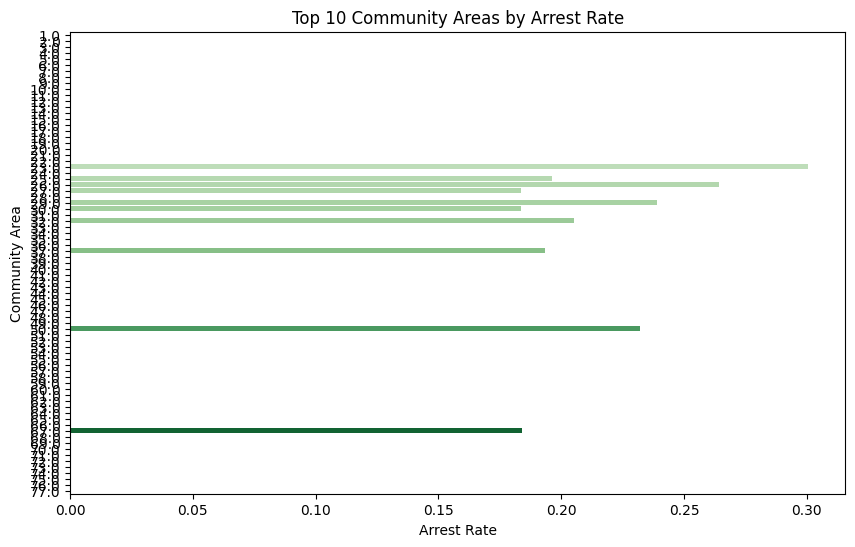

Community Area
23.0    0.300606
26.0    0.264430
29.0    0.238910
50.0    0.232252
32.0    0.205125
25.0    0.196224
37.0    0.193265
67.0    0.184187
27.0    0.183608
30.0    0.183544
Name: Arrest, dtype: float64

In [28]:
area_arrest = crime.groupby('Community Area')['Arrest'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=area_arrest.values, y=area_arrest.index, palette='Greens')
plt.title('Top 10 Community Areas by Arrest Rate')
plt.xlabel('Arrest Rate')
plt.ylabel('Community Area')
plt.show()
area_arrest

**Insight:** Arrest rates vary significantly by community area.

### Q24. What is the trend of non-domestic crimes over the years?

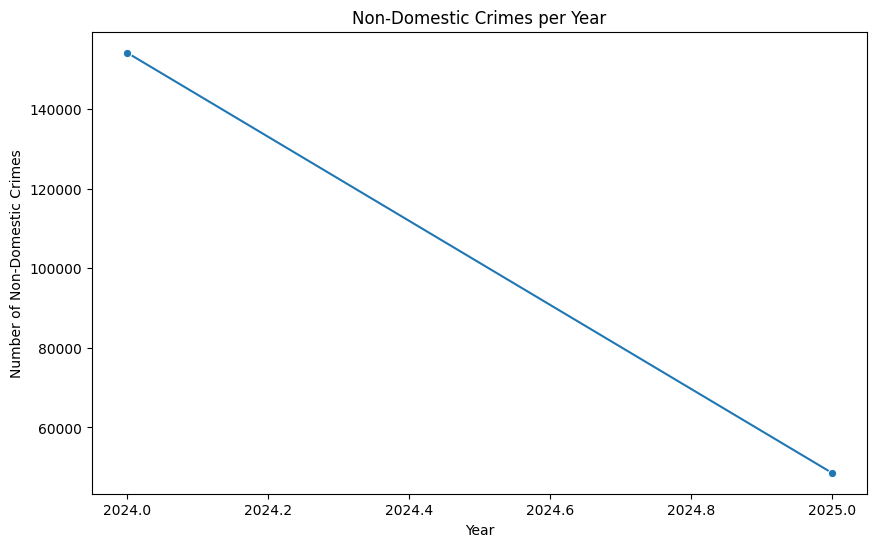

Year
2024    154145
2025     48631
Name: Domestic, dtype: int64

In [29]:
non_domestic_trend = crime.groupby('Year')['Domestic'].apply(lambda x: (~x).sum())
plt.figure(figsize=(10,6))
sns.lineplot(x=non_domestic_trend.index, y=non_domestic_trend.values, marker='o')
plt.title('Non-Domestic Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Non-Domestic Crimes')
plt.show()
non_domestic_trend

**Insight:** Non-domestic crimes dominate the overall trend.

### Q25. What is the distribution of crimes by ward and year?

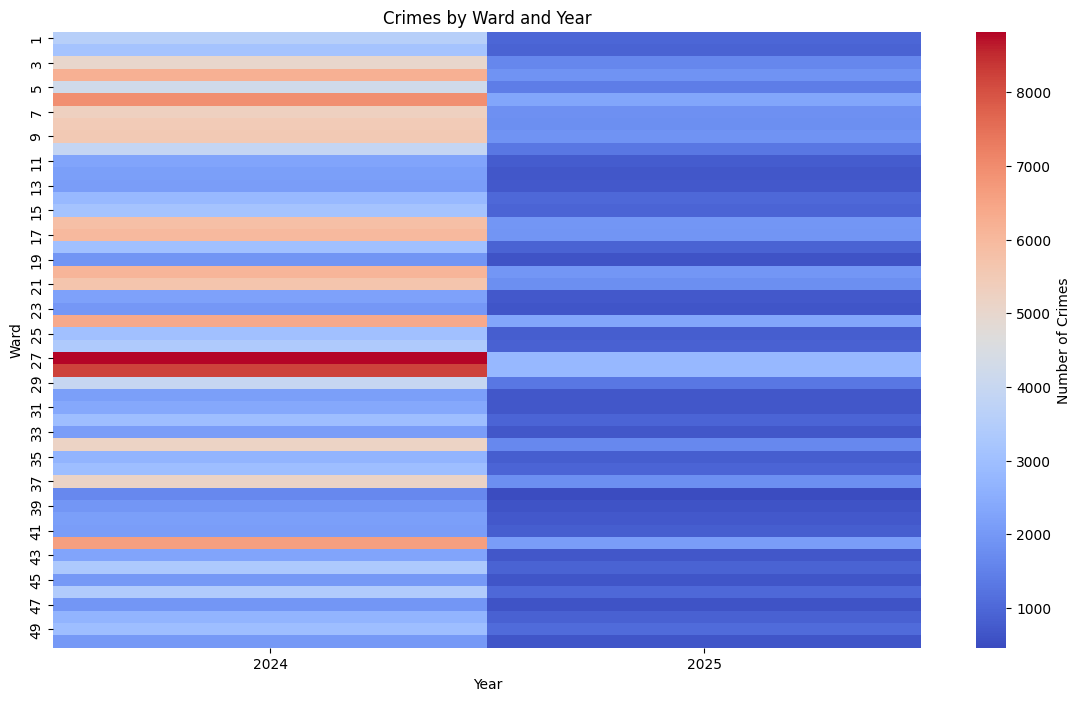

Year,2024,2025
Ward,,
1,3567,954
2,3112,902
3,5027,1613
4,6227,1868
5,4217,1421
6,6949,2297
7,5262,1824
8,5472,1775
9,5527,1872


In [30]:
ward_year = pd.crosstab(crime['Ward'], crime['Year'])
plt.figure(figsize=(14,8))
sns.heatmap(ward_year, cmap='coolwarm', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crimes by Ward and Year')
plt.xlabel('Year')
plt.ylabel('Ward')
plt.show()
ward_year


**Insight:** Crime distribution by ward changes over the years.

### Q26. What is the trend of crimes by day of the week?

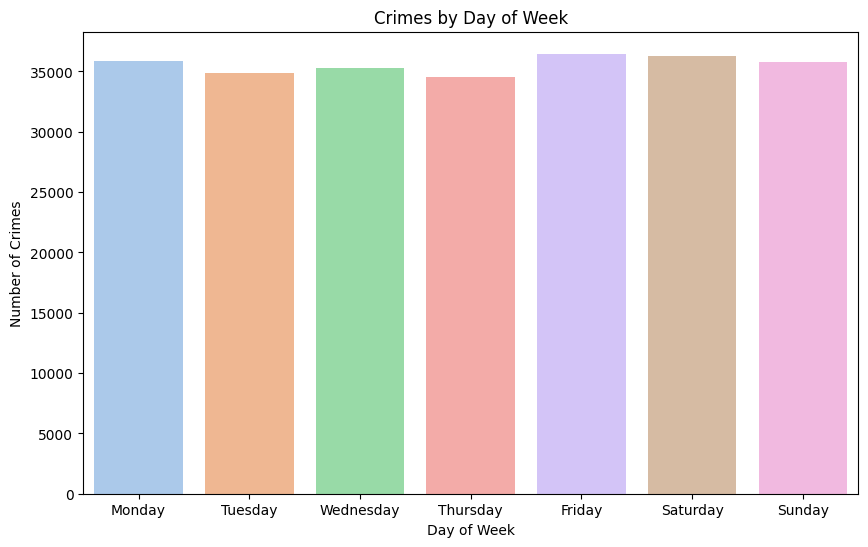

DayOfWeek
Monday       35872
Tuesday      34857
Wednesday    35294
Thursday     34553
Friday       36470
Saturday     36257
Sunday       35820
Name: count, dtype: int64

In [31]:
crime['DayOfWeek'] = pd.to_datetime(crime['Date'].astype(str), errors='coerce').dt.day_name()
dow_counts = crime['DayOfWeek'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,6))
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='pastel')
plt.title('Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()
dow_counts

**Insight:** Some days of the week have higher crime rates.

### Q27. What is the distribution of crimes by updated date?

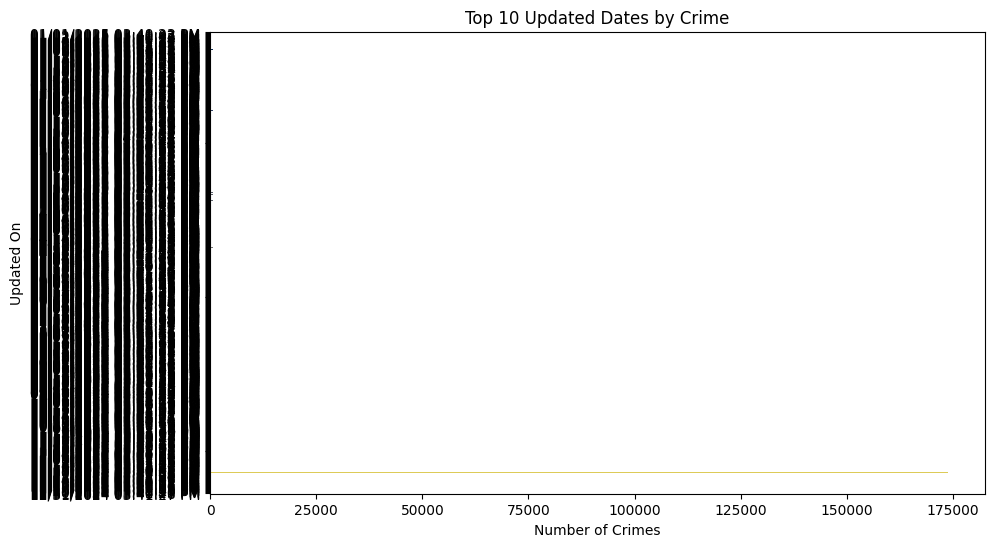

Updated On
12/21/2024 03:40:46 PM    173935
03/23/2025 03:42:04 PM       705
04/19/2025 03:41:24 PM       660
03/22/2025 03:41:01 PM       642
03/26/2025 03:41:04 PM       637
02/09/2025 03:41:48 PM       636
03/30/2025 03:41:18 PM       635
01/09/2025 03:41:07 PM       630
04/05/2025 03:40:58 PM       630
03/29/2025 03:41:10 PM       628
Name: count, dtype: int64

In [32]:
updated_counts = crime['Updated On'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=updated_counts.values, y=updated_counts.index, palette='cividis')
plt.title('Top 10 Updated Dates by Crime')
plt.xlabel('Number of Crimes')
plt.ylabel('Updated On')
plt.show()
updated_counts

**Insight:** Some dates see more updates, possibly due to reporting or data entry patterns.

### Q28. What is the distribution of crimes by latitude?

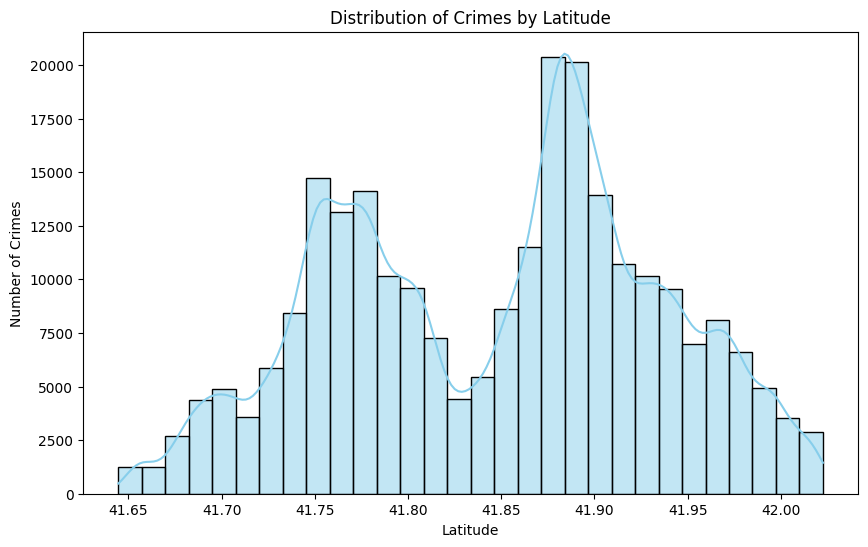

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(crime['Latitude'].astype(float), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Crimes by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number of Crimes')
plt.show()

**Insight:** Latitude distribution shows the north-south spread of crimes.

### Q29. What is the distribution of crimes by longitude?

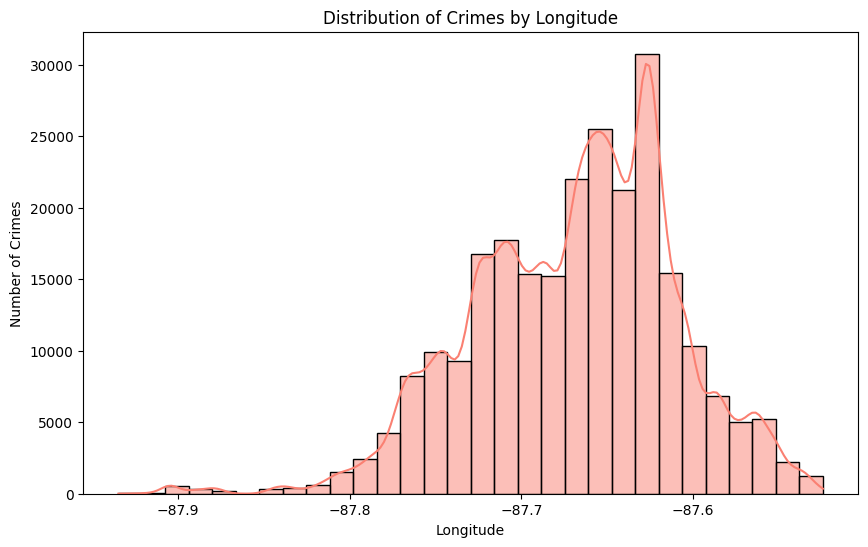

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(crime['Longitude'].astype(float), bins=30, kde=True, color='salmon')
plt.title('Distribution of Crimes by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number of Crimes')
plt.show()

**Insight:** Longitude distribution shows the east-west spread of crimes.

### Q30. What is the relationship between arrests and domestic crimes?

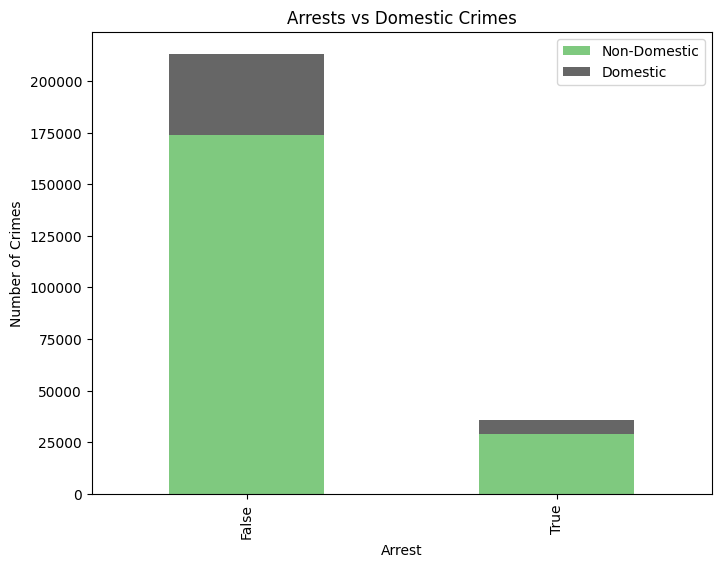

Domestic,False,True
Arrest,,
False,173651,39470
True,29125,6877


In [35]:
arrest_domestic = pd.crosstab(crime['Arrest'], crime['Domestic'])
arrest_domestic.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Accent')
plt.title('Arrests vs Domestic Crimes')
plt.xlabel('Arrest')
plt.ylabel('Number of Crimes')
plt.legend(['Non-Domestic', 'Domestic'])
plt.show()
arrest_domestic

**Insight:** The relationship between arrests and domestic crimes can be visualized.

### Q31. What is the trend of crimes by primary type for the last 5 years?

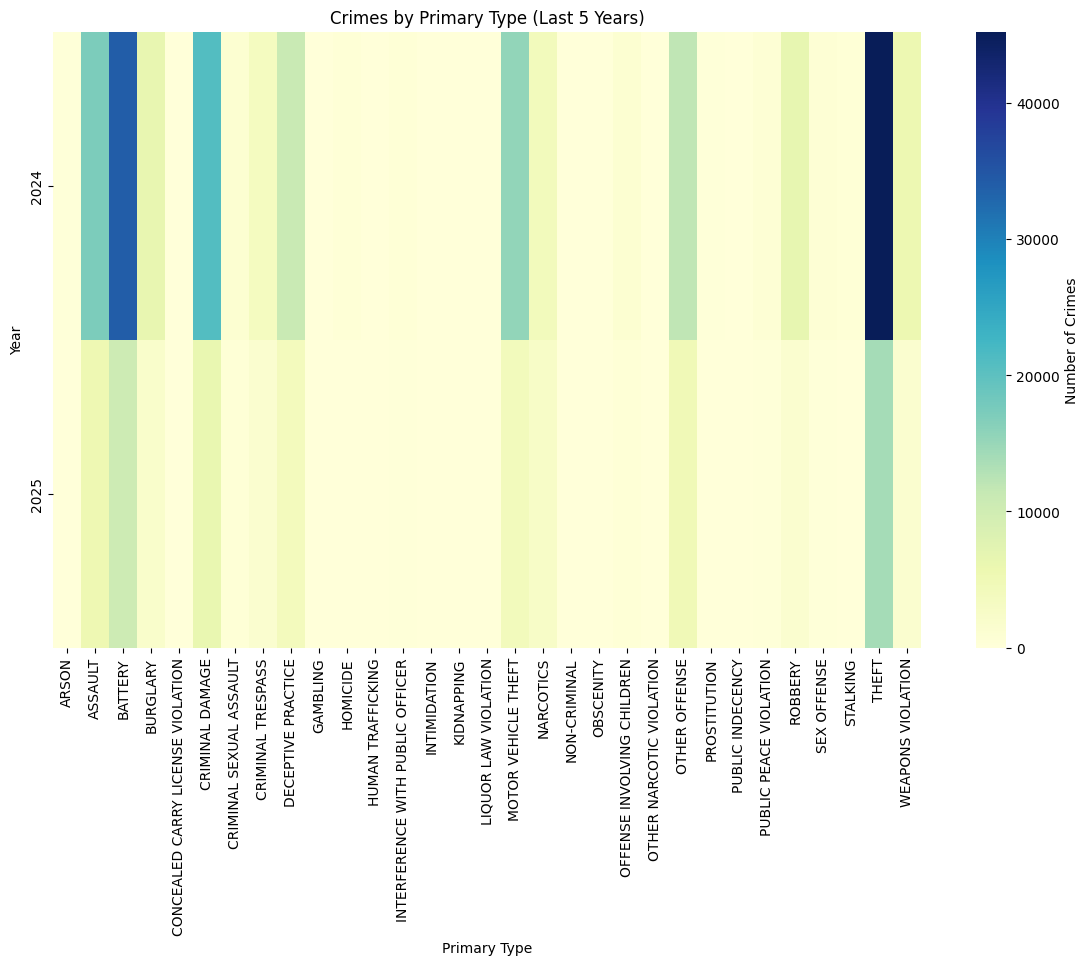

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Hour,DayOfWeek
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,0,Sunday
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,0,Sunday
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,0,Sunday
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,0,Sunday
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)",4,0,Saturday
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",4,0,Saturday
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)",4,0,Saturday
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",4,0,Saturday


In [36]:
last5 = crime[crime['Year'] >= (crime['Year'].max() - 4)]
pivot5 = pd.crosstab(last5['Year'], last5['Primary Type'])
plt.figure(figsize=(14,8))
sns.heatmap(pivot5, cmap='YlGnBu', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crimes by Primary Type (Last 5 Years)')
plt.xlabel('Primary Type')
plt.ylabel('Year')
plt.show()
pivot5
last5

**Insight:** Recent trends in crime types can be identified.

### Q32. What is the arrest rate by hour of the day?

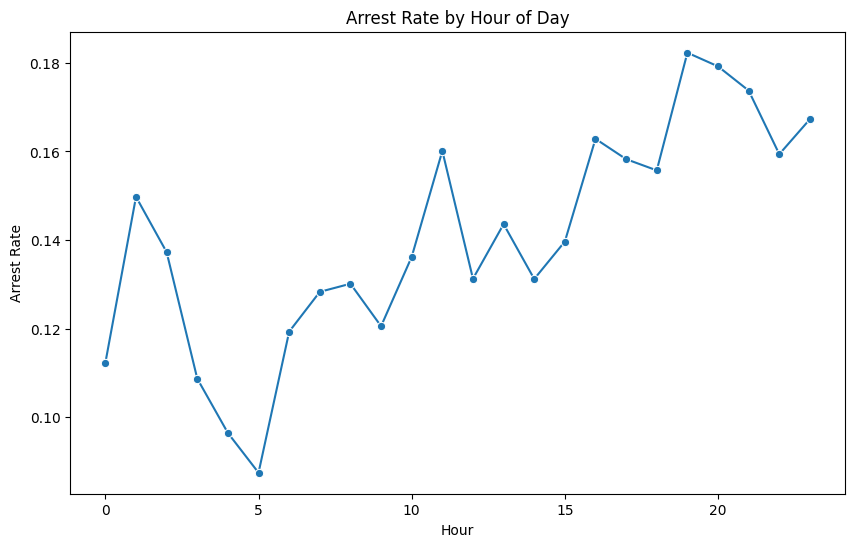

Hour
0     0.112285
1     0.149762
2     0.137260
3     0.108692
4     0.096422
5     0.087453
6     0.119309
7     0.128298
8     0.130131
9     0.120539
10    0.136204
11    0.160120
12    0.131256
13    0.143592
14    0.131200
15    0.139664
16    0.162854
17    0.158263
18    0.155728
19    0.182297
20    0.179213
21    0.173747
22    0.159382
23    0.167294
Name: Arrest, dtype: float64

In [37]:
hour_arrest = crime.groupby('Hour')['Arrest'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=hour_arrest.index, y=hour_arrest.values, marker='o')
plt.title('Arrest Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.show()
hour_arrest

**Insight:** Arrest rates may vary by time of day.

### Q33. What is the distribution of crimes by year and arrest status?

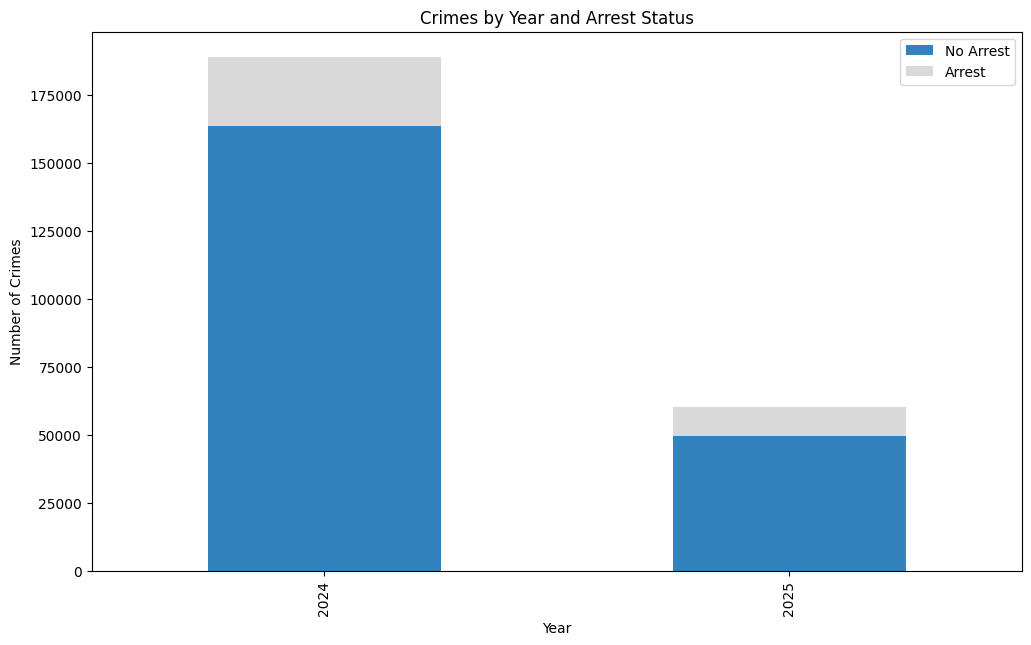

Arrest,False,True
Year,,
2024,163501,25417
2025,49620,10585


In [38]:
year_arrest = pd.crosstab(crime['Year'], crime['Arrest'])
year_arrest.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20c')
plt.title('Crimes by Year and Arrest Status')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(['No Arrest', 'Arrest'])
plt.show()
year_arrest

**Insight:** The proportion of arrests changes over the years.

### Q34. What is the distribution of crimes by day of week and hour?

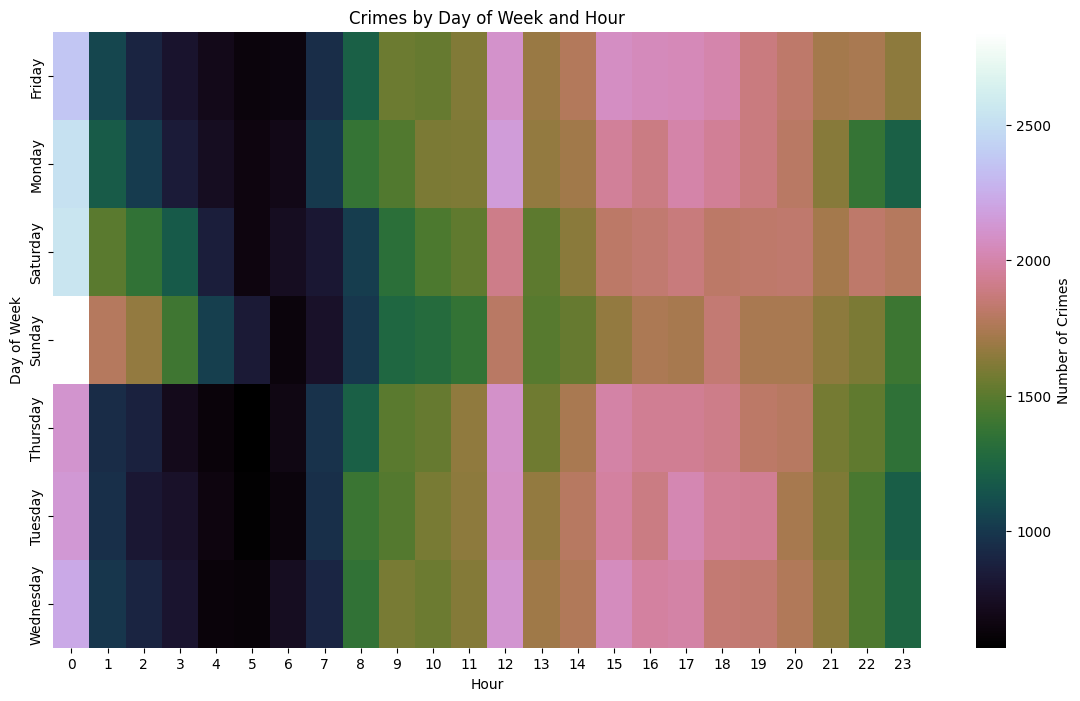

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,2369,1070,891,783,695,640,645,943,1213,1553,...,1769,2078,2044,2041,2006,1882,1818,1715,1739,1648
Monday,2518,1189,1015,838,729,657,687,1011,1373,1474,...,1706,1947,1887,1994,1943,1883,1795,1629,1376,1210
Saturday,2544,1494,1353,1176,854,656,735,815,1026,1327,...,1635,1804,1831,1866,1806,1820,1826,1716,1814,1780
Sunday,2843,1784,1667,1411,1039,833,640,770,1004,1253,...,1534,1664,1745,1729,1845,1738,1734,1648,1592,1396
Thursday,2111,941,872,707,625,569,670,976,1215,1496,...,1739,1990,1929,1930,1902,1809,1794,1577,1513,1347
Tuesday,2137,953,812,768,655,580,634,952,1388,1482,...,1787,1972,1884,2020,1941,1931,1729,1606,1442,1205
Wednesday,2230,989,894,794,630,616,733,901,1357,1586,...,1766,2056,1968,1986,1843,1839,1764,1643,1460,1247


In [39]:
dow_hour = pd.crosstab(crime['DayOfWeek'], crime['Hour'])
plt.figure(figsize=(14,8))
sns.heatmap(dow_hour, cmap='cubehelix', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crimes by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()
dow_hour

**Insight:** Certain hours and days are more prone to crime.

### Q35. What is the trend of crimes for the most common crime type over the years?

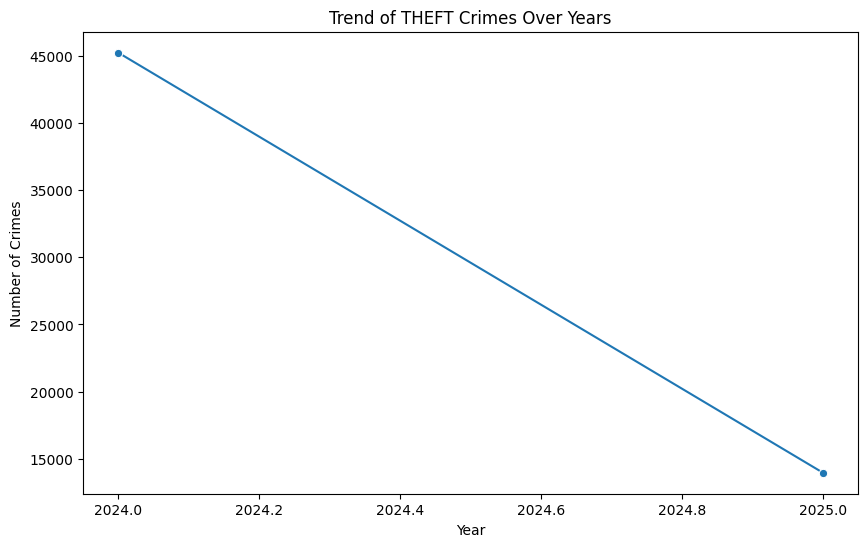

Year
2024    45239
2025    13962
dtype: int64

In [40]:
common_type = crime['Primary Type'].value_counts().idxmax()
common_trend = crime[crime['Primary Type'] == common_type].groupby('Year').size()
plt.figure(figsize=(10,6))
sns.lineplot(x=common_trend.index, y=common_trend.values, marker='o')
plt.title(f'Trend of {common_type} Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()
common_type
common_trend

**Insight:** The trend for the most common crime type can be tracked over time.